In [14]:
import pandas as pd

In [15]:
df_products = pd.read_excel("Тестовое_без_ответов.xlsx", sheet_name = 'Продукты')
df_products

,ID продукта,Название продукта,Юнит
0,product1,Здоровый образ жизни,A
1,product2,Экскурс в историю моды,A
2,product3,Как научиться ценить музыку,B
3,product4,Путеводитель по истории искусства,B
4,product5,История западных культур,A
5,product6,Современный этикет,B
6,product7,Как аргументировать свою позицию,A
7,product8,Что скрыл художник?,A
8,product9,Искусство киноязыка,B
9,product10,Введение в нейробиологию,B


In [16]:
df_orders = pd.read_excel("Тестовое_без_ответов.xlsx", sheet_name = 'Заказы')
df_orders

,Order ID,Дата создания,User ID,ID продукта,Оплачен,Дата платежа,Сумма платежа,Сумма заказа,Сумма скидки
0,order1,2019-01-01 05:19:00,id13276,product2,да,2019-01-01 05:22:00,4050.0,4050,0.0
1,order3,2019-01-01 16:07:00,id10315,product1,да,2019-01-01 16:13:00,4300.0,4300,0.0
2,order4,2019-01-01 18:58:00,id10036,product4,да,2019-01-01 19:02:00,4300.0,4300,0.0
3,order6,2019-01-01 19:56:00,id12315,product3,да,2019-01-01 19:58:00,4200.0,4200,0.0
4,order7,2019-01-01 21:24:00,id7700,product2,да,2019-01-01 21:25:00,4050.0,4050,0.0
...,...,...,...,...,...,...,...,...,...
21280,order21938,2019-12-29 21:28:00,id14621,product9,нет,неоплачен,3220.0,4600,1380.0
21281,order21939,2019-12-29 22:08:00,id3056,product9,нет,неоплачен,3220.0,4600,1380.0
21282,order21941,2019-12-29 22:12:00,id3056,product7,нет,неоплачен,2765.0,3950,1185.0
21283,order21946,2019-12-29 23:53:00,id14618,product7,нет,неоплачен,3950.0,3950,0.0


In [17]:
df_NPS = pd.read_excel("Тестовое_без_ответов.xlsx", sheet_name = 'NPS')
df_NPS

,Название курса,ID пользователя,Оценка
0,Введение в нейробиологию,id7137,7
1,Введение в нейробиологию,id6805,7
2,Введение в нейробиологию,id3323,8
3,Введение в нейробиологию,id2286,4
4,Введение в нейробиологию,id14009,7
...,...,...,...
13858,Экскурс в историю моды,id689,10
13859,Экскурс в историю моды,id468,8
13860,Экскурс в историю моды,id7055,9
13861,Экскурс в историю моды,id460,3


# 1) Найти долю незавершенных заказов среди всех заказов бизнеса.

Сортирую датафрейм по значениям колонки "Оплачен" так, чтобы сначала шли все оплаченные заказы, а затем удаляю дубликаты по колонке 'User ID', оставляя первую строку с оплаченным заказом (Таким образом, если один и тот же клиент в конечном итоге оплатил заказ, то я оставляю данные только по этой транзакции)

In [33]:
df_orders = df_orders.sort_values(by=['Оплачен']).drop_duplicates(subset=['User ID'], keep='first')

In [34]:
df_orders

,Order ID,Дата создания,User ID,ID продукта,Оплачен,Дата платежа,Сумма платежа,Сумма заказа,Сумма скидки
0,order1,2019-01-01 05:19:00,id13276,product2,да,2019-01-01 05:22:00,4050.0,4050,0.0
2,order4,2019-01-01 18:58:00,id10036,product4,да,2019-01-01 19:02:00,4300.0,4300,0.0
3,order6,2019-01-01 19:56:00,id12315,product3,да,2019-01-01 19:58:00,4200.0,4200,0.0
4,order7,2019-01-01 21:24:00,id7700,product2,да,2019-01-01 21:25:00,4050.0,4050,0.0
5,order8,2019-01-01 22:54:00,id5591,product4,да,2019-01-01 22:55:00,4300.0,4300,0.0
...,...,...,...,...,...,...,...,...,...
21273,order21895,2019-12-28 21:23:00,id14628,product8,нет,неоплачен,4500.0,4500,0.0
21275,order21910,2019-12-29 10:57:00,id14626,product4,нет,неоплачен,4300.0,4300,0.0
21280,order21938,2019-12-29 21:28:00,id14621,product9,нет,неоплачен,3220.0,4600,1380.0
17693,order11343,2019-08-01 13:14:00,id18252,product7,нет,неоплачен,3160.0,3950,790.0


In [35]:
#проверяю отсутствие дубликатов в колонке User ID
df_orders['User ID'].value_counts().unique()

array([1], dtype=int64)

In [38]:
df_orders['Оплачен'].value_counts()

да     12040
нет     3271
Name: Оплачен, dtype: int64

In [36]:
#Долю незавершенных заказов считаем по колонке "Оплачен"
ratio_of_unpaid_orders = df_orders['Оплачен'].value_counts()[1] / (df_orders['Оплачен'].value_counts()[0] + df_orders['Оплачен'].value_counts()[1])
ratio_of_unpaid_orders

0.21363725426164196

**Доля незавершенных заказов среди всех заказов бизнеса равняется 21,4%**

In [320]:
#Оставляем только завершенные заказы
df_cleared_orders = df_orders.loc[df_orders['Оплачен'] != 'нет']
df_cleared_orders

,Order ID,Дата создания,User ID,ID продукта,Оплачен,Дата платежа,Сумма платежа,Сумма заказа,Сумма скидки
0,order1,2019-01-01 05:19:00,id13276,product2,да,2019-01-01 05:22:00,4050.0,4050,0.0
2,order4,2019-01-01 18:58:00,id10036,product4,да,2019-01-01 19:02:00,4300.0,4300,0.0
3,order6,2019-01-01 19:56:00,id12315,product3,да,2019-01-01 19:58:00,4200.0,4200,0.0
4,order7,2019-01-01 21:24:00,id7700,product2,да,2019-01-01 21:25:00,4050.0,4050,0.0
5,order8,2019-01-01 22:54:00,id5591,product4,да,2019-01-01 22:55:00,4300.0,4300,0.0
...,...,...,...,...,...,...,...,...,...
13839,order21917,2019-12-29 12:05:00,id4081,product6,да,2019-12-29 12:07:00,4200.0,4200,0.0
13824,order21899,2019-12-28 22:20:00,id1929,product9,да,2019-12-28 22:23:00,4600.0,4600,0.0
13862,order21948,2019-12-30 08:35:00,id1441,product8,да,2019-12-30 18:49:00,4500.0,4500,0.0
13860,order21945,2019-12-29 23:50:00,id5315,product7,да,2019-12-29 23:51:00,3950.0,3950,0.0


**2)Во вкладке “Продукты” находится список всех продуктов и их свойств. Каждый продукт находится в зоне ответственности подразделения (бизнес-юнита): A или B.**

# i) Посчитай выручку и средние чеки (выручка / кол-во клиентов) юнитов A или B за год. Какой отдел приносит больше выручки компании?

In [57]:
df_products

,ID продукта,Название продукта,Юнит
0,product1,Здоровый образ жизни,A
1,product2,Экскурс в историю моды,A
2,product3,Как научиться ценить музыку,B
3,product4,Путеводитель по истории искусства,B
4,product5,История западных культур,A
5,product6,Современный этикет,B
6,product7,Как аргументировать свою позицию,A
7,product8,Что скрыл художник?,A
8,product9,Искусство киноязыка,B
9,product10,Введение в нейробиологию,B


In [89]:
df_cleared_orders['ID продукта'].value_counts(sort=True)

product7     3992
product8     1526
product11    1090
product10    1000
product4      956
product9      751
product3      731
product2      664
product5      579
product1      487
product6      264
Name: ID продукта, dtype: int64

In [104]:
df_of_revenue = pd.DataFrame(df_cleared_orders.groupby(by='ID продукта', sort=True).sum())
df_of_revenue

,Сумма платежа,Сумма заказа,Сумма скидки
ID продукта,,,
product1,1.712982e+06,2094100,3.811182e+05
product10,3.615523e+06,4200000,5.844771e+05
product11,3.993733e+06,4360000,3.662665e+05
product2,2.307534e+06,2689200,3.816658e+05
product3,2.496216e+06,3070200,5.739838e+05
product4,3.281384e+06,4110800,8.294158e+05
product5,1.851622e+06,2258100,4.064784e+05
product6,8.676339e+05,1108800,2.411661e+05
product7,1.372488e+07,15768400,2.043521e+06


In [94]:
print("Выручка юнита А: ", df_of_revenue['Сумма платежа']['product1'] + df_of_revenue['Сумма платежа']['product2'] + df_of_revenue['Сумма платежа']['product5'] + df_of_revenue['Сумма платежа']['product7'] + df_of_revenue['Сумма платежа']['product8'])
print("Средний чек юнита А: ", (df_of_revenue['Сумма платежа']['product1'] + df_of_revenue['Сумма платежа']['product2'] + df_of_revenue['Сумма платежа']['product5'] + df_of_revenue['Сумма платежа']['product7'] + df_of_revenue['Сумма платежа']['product8'])/(487+664+579+3992+1526))
print(' ')
print("Выручка юнита B: ", df_of_revenue['Сумма платежа']['product3'] + df_of_revenue['Сумма платежа']['product4'] + df_of_revenue['Сумма платежа']['product6'] + df_of_revenue['Сумма платежа']['product9'] + df_of_revenue['Сумма платежа']['product10'] + df_of_revenue['Сумма платежа']['product11'])
print("Средний чек юнита B: ", (df_of_revenue['Сумма платежа']['product3'] + df_of_revenue['Сумма платежа']['product4'] + df_of_revenue['Сумма платежа']['product6'] + df_of_revenue['Сумма платежа']['product9'] + df_of_revenue['Сумма платежа']['product10'] + df_of_revenue['Сумма платежа']['product11'])/(731+956+264+751+1000+1090))


Выручка юнита А:  25296292.79239693
Средний чек юнита А:  3490.1066214675675
 
Выручка юнита B:  17085465.46611115
Средний чек юнита B:  3565.4143293220263


**Вывод: Подразделение А приносит больше выручки для компании (несмотря на сравнительное превосходство юнита В в размере среднего чека = 2.15%)** 

# ii) Изобрази на диаграмме долю каждого курса в выручке юнитов A и B по месяцам. Какие курсы приносили юнитам больше всего дохода в каждый из месяцев (требуется вывести названия курсов)?

In [322]:
df_cleared_orders.reset_index(drop=True, inplace=True)

In [323]:
df_cleared_orders['Дата платежа'][150]

datetime.datetime(2019, 1, 19, 16, 22)

In [324]:
for i in range(12040):
    df_cleared_orders['Дата платежа'][i] = df_cleared_orders['Дата платежа'][i].month

<ipython-input-324-5d3a8e48cc17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleared_orders['Дата платежа'][i] = df_cleared_orders['Дата платежа'][i].month
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [325]:
df_cleared_orders['Дата платежа']

0         1
1         1
2         1
3         1
4         1
         ..
12035    12
12036    12
12037    12
12038    12
12039    12
Name: Дата платежа, Length: 12040, dtype: object

In [326]:
df_cleared_orders.groupby(by=['ID продукта', 'Дата платежа'], group_keys=False, sort=True).sum()

Сумма платежа  Сумма заказа   Сумма скидки
ID продукта Дата платежа                                            
product1    1             189381.652771        262300   72918.347229
            2             540222.684766        653600  113377.315234
            3             159960.000000        163400    3440.000000
            4             226395.000000        249400   23005.000000
            5              71595.000000         98900   27305.000000
...                                 ...           ...            ...
product9    8             377591.916509        437000   59408.083491
            9             481763.481146        538200   56436.518854
            10            303600.000000        308200    4600.000000
            11            291923.076923        363400   71476.923077
            12            823874.838710       1048800  224925.161290

[109 rows x 3 columns]

In [698]:
df_date_distribution['Сумма платежа']['product2']

Дата платежа
1     239771.538462
2     145251.031469
3      30759.230769
4      98793.870968
5     115254.264706
6     238392.964896
7     823836.274343
8     316008.358634
9      93517.615385
10    120494.032258
11     73305.000000
12     12150.000000
Name: Сумма платежа, dtype: float64

In [ ]:
df_date_distribution = pd.DataFrame(df_cleared_orders.groupby(by=['ID продукта', 'Дата платежа'], sort=True).sum())

In [703]:
df_dates_products_distribution = pd.DataFrame(df_date_distribution['Сумма платежа']['product2'])
df_dates_products_distribution['product1'] = df_date_distribution['Сумма платежа']['product1'] 
df_dates_products_distribution['product2'] = df_date_distribution['Сумма платежа']['product2'] 
df_dates_products_distribution['product3'] = df_date_distribution['Сумма платежа']['product3']
df_dates_products_distribution['product4'] = df_date_distribution['Сумма платежа']['product4']
df_dates_products_distribution['product5'] = df_date_distribution['Сумма платежа']['product5']
df_dates_products_distribution['product6'] = df_date_distribution['Сумма платежа']['product6']
df_dates_products_distribution['product7'] = df_date_distribution['Сумма платежа']['product7']
df_dates_products_distribution['product8'] = df_date_distribution['Сумма платежа']['product8']
df_dates_products_distribution['product9'] = df_date_distribution['Сумма платежа']['product9']
df_dates_products_distribution['product10'] = df_date_distribution['Сумма платежа']['product10']
df_dates_products_distribution['product11'] = df_date_distribution['Сумма платежа']['product11']
df_dates_products_distribution = df_dates_products_distribution.drop('Сумма платежа', axis=1)
df_dates_products_distribution = df_dates_products_distribution.T
df_dates_products_distribution

Дата платежа,1,2,3,4,5,6,7,8,9,10,11,12
product1,189381.652771,540222.684766,1.599600e+05,2.263950e+05,71595.000000,1.389743e+05,9.675000e+04,159843.128205,18060.000000,1.290000e+04,9.890000e+04,NaN
product2,239771.538462,145251.031469,3.075923e+04,9.879387e+04,115254.264706,2.383930e+05,8.238363e+05,316008.358634,93517.615385,1.204940e+05,7.330500e+04,1.215000e+04
product3,557377.543132,284653.697270,9.390908e+04,1.806000e+05,201040.611006,1.439652e+05,1.798889e+05,133783.521822,54600.000000,2.872800e+05,2.274977e+05,1.516200e+05
product4,515098.389468,204148.628959,1.100800e+05,2.473337e+05,447682.521764,2.137690e+05,3.880218e+05,250661.501466,175692.598064,1.926400e+05,2.374061e+05,2.988500e+05
product5,435809.161501,372382.580645,2.315918e+05,9.195021e+04,140183.612903,5.304000e+04,2.164271e+05,2340.000000,22620.000000,1.747955e+05,8.084165e+04,2.964000e+04
product6,166721.584229,160635.930521,1.638000e+04,NaN,2100.000000,NaN,4.452000e+04,248796.422287,27720.000000,6.552000e+04,4.578000e+04,8.946000e+04
product7,NaN,NaN,1.249405e+06,1.586142e+06,838786.878290,2.288353e+06,1.085429e+06,994350.164175,159103.676471,2.549621e+06,1.609965e+06,1.363722e+06
product8,NaN,NaN,NaN,1.445629e+06,649538.807758,8.261065e+05,8.439268e+05,715308.002031,262694.117647,1.485000e+05,2.936735e+05,5.139000e+05
product9,NaN,NaN,NaN,1.840000e+04,305813.083779,8.442025e+04,1.435881e+05,377591.916509,481763.481146,3.036000e+05,2.919231e+05,8.238748e+05
product10,NaN,NaN,NaN,NaN,NaN,2.168555e+05,1.055601e+06,211976.021019,114545.454545,8.246785e+05,3.500473e+05,8.418195e+05


In [290]:
Unit_A = df_date_distribution['Сумма платежа']['product1'].add(df_date_distribution['Сумма платежа']['product2'], fill_value=0)
Unit_A = Unit_A.add(df_date_distribution['Сумма платежа']['product5'], fill_value=0)
Unit_A = Unit_A.add(df_date_distribution['Сумма платежа']['product7'], fill_value=0)
Unit_A = Unit_A.add(df_date_distribution['Сумма платежа']['product8'], fill_value=0)

In [719]:
Unit_B = df_date_distribution['Сумма платежа']['product3'].add(df_date_distribution['Сумма платежа']['product4'], fill_value=0)
Unit_B = Unit_B.add(df_date_distribution['Сумма платежа']['product6'], fill_value=0)
Unit_B = Unit_B.add(df_date_distribution['Сумма платежа']['product9'], fill_value=0)
Unit_B = Unit_B.add(df_date_distribution['Сумма платежа']['product10'], fill_value=0)
Unit_B = Unit_B.add(df_date_distribution['Сумма платежа']['product11'], fill_value=0)

In [694]:
#Общая выручка А по месяцам + Общая выручка B по месяцам
Unit_A + Unit_B

Дата платежа
1     2.104160e+06
2     1.707295e+06
3     1.892085e+06
4     3.895244e+06
5     2.771995e+06
6     4.203877e+06
7     4.877989e+06
8     3.457459e+06
9     1.646403e+06
10    6.751973e+06
11    4.534196e+06
12    4.539083e+06
Name: Сумма платежа, dtype: float64

In [377]:
df_products

,ID продукта,Название продукта,Юнит
0,product1,Здоровый образ жизни,A
1,product2,Экскурс в историю моды,A
2,product3,Как научиться ценить музыку,B
3,product4,Путеводитель по истории искусства,B
4,product5,История западных культур,A
5,product6,Современный этикет,B
6,product7,Как аргументировать свою позицию,A
7,product8,Что скрыл художник?,A
8,product9,Искусство киноязыка,B
9,product10,Введение в нейробиологию,B


In [446]:
df_product1_Unit_A_ratio = df_date_distribution['Сумма платежа']['product1'] / Unit_A
df_product1_Unit_A_ratio = df_product1_Unit_A_ratio.fillna(0)

In [380]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]

In [705]:
df_dates_products_distribution = df_dates_products_distribution.fillna(0)

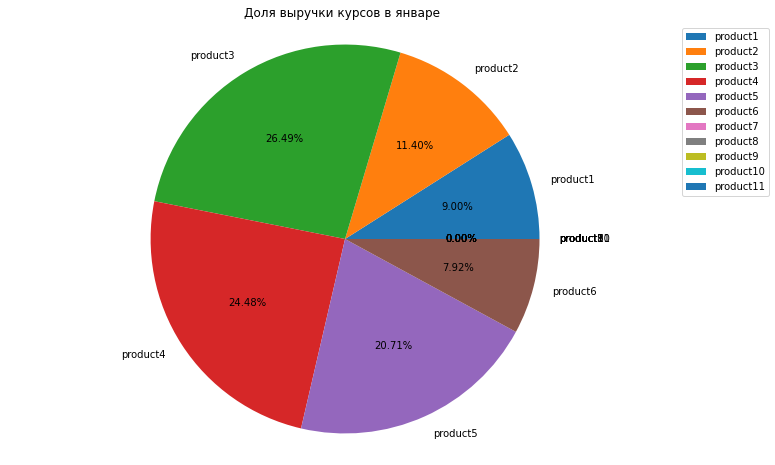

In [714]:
fig1, ax1 = plt.subplots()
labels = ['product1', 'product2', 'product3', 'product4', 'product5', 'product6', 'product7', 'product8', 'product9', 'product10',  'product11'] 
wedges, texts, autotexts = ax1.pie(df_dates_products_distribution[1], labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Доля выручки курсов в январе')
plt.show()

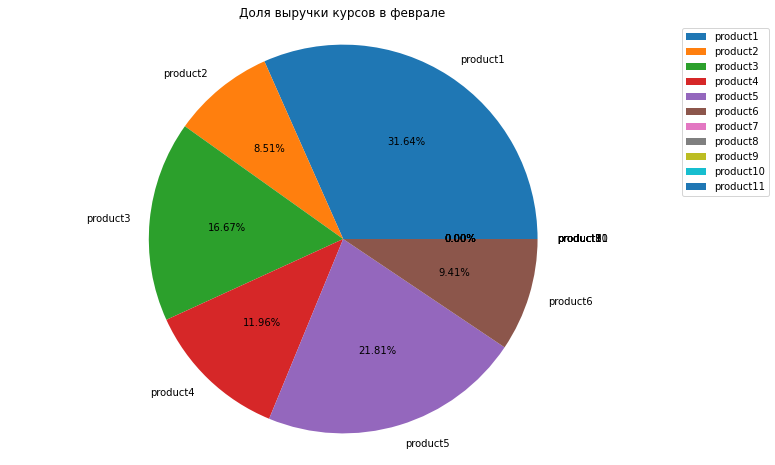

In [715]:
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(df_dates_products_distribution[2], labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Доля выручки курсов в феврале')
plt.show()

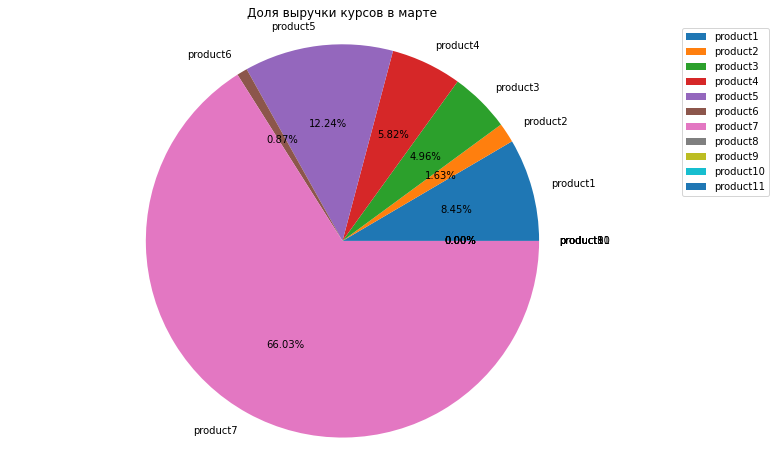

In [716]:
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(df_dates_products_distribution[3], labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Доля выручки курсов в марте')
plt.show()

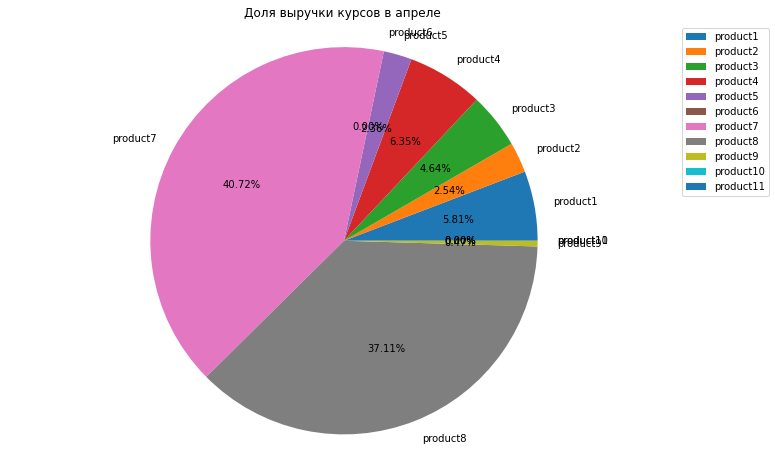

In [717]:
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie((df_dates_products_distribution[4]), labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Доля выручки курсов в апреле')
plt.show()

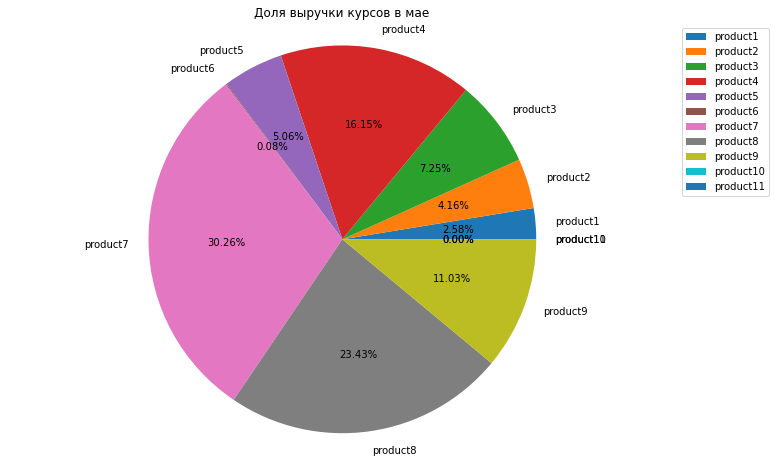

In [718]:
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(df_dates_products_distribution[5], labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Доля выручки курсов в мае')
plt.show()

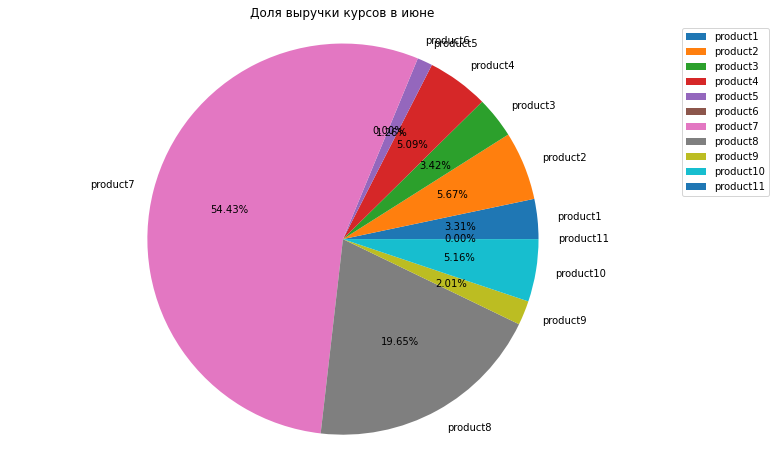

In [720]:
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(df_dates_products_distribution[6], labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Доля выручки курсов в июне')
plt.show()

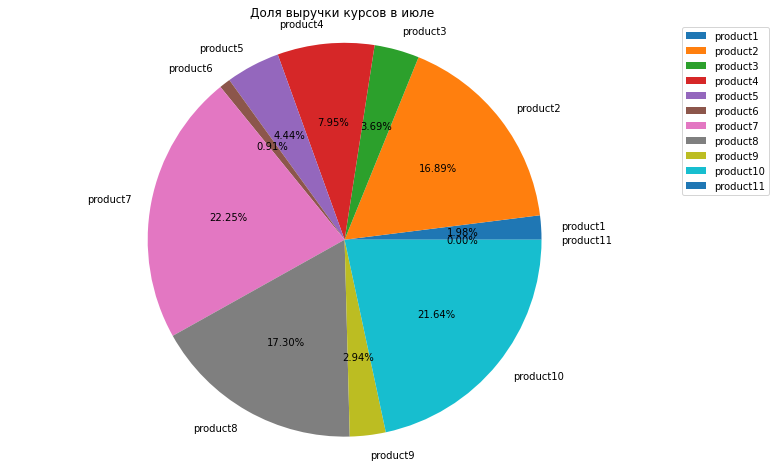

In [721]:
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(df_dates_products_distribution[7], labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Доля выручки курсов в июле')
plt.show()

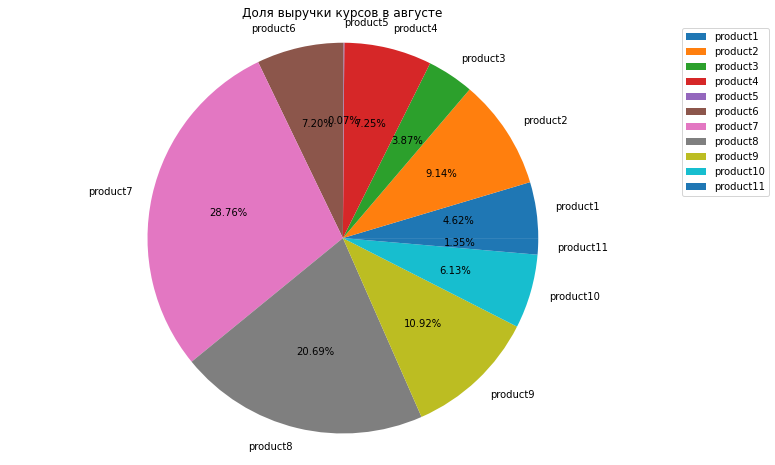

In [722]:
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(df_dates_products_distribution[8], labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Доля выручки курсов в августе')
plt.show()

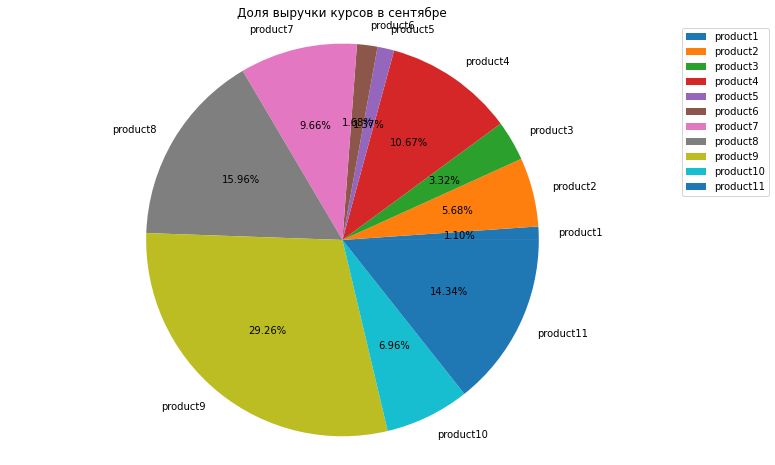

In [723]:
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(df_dates_products_distribution[9], labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Доля выручки курсов в сентябре')
plt.show()

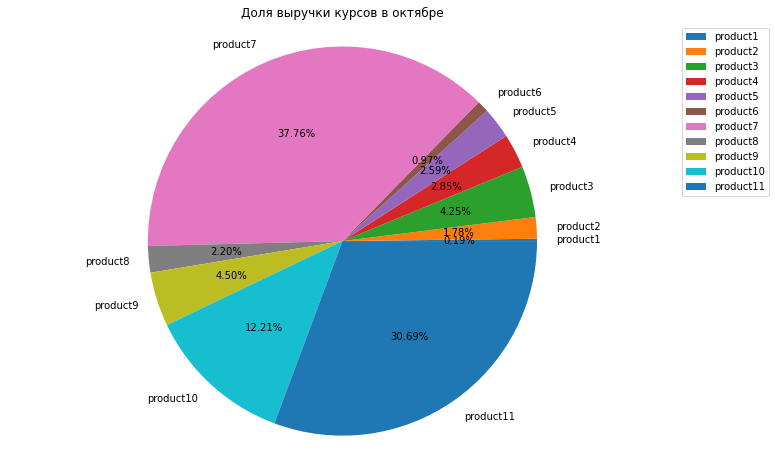

In [724]:
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(df_dates_products_distribution[10], labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Доля выручки курсов в октябре')
plt.show()

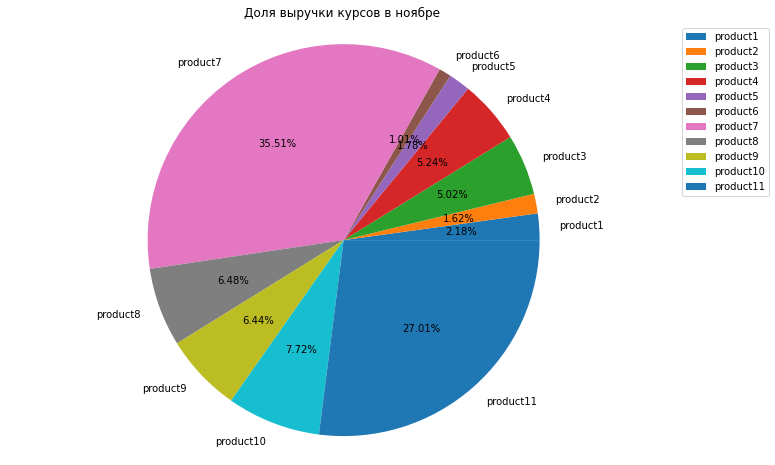

In [726]:
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(df_dates_products_distribution[11], labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Доля выручки курсов в ноябре')
plt.show()

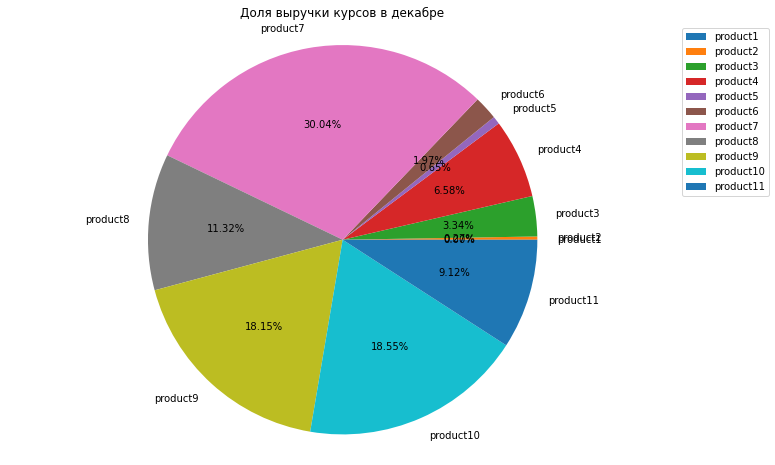

In [727]:
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(df_dates_products_distribution[12], labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Доля выручки курсов в декабре')
plt.show()

In [728]:
df_products

,ID продукта,Название продукта,Юнит
0,product1,Здоровый образ жизни,A
1,product2,Экскурс в историю моды,A
2,product3,Как научиться ценить музыку,B
3,product4,Путеводитель по истории искусства,B
4,product5,История западных культур,A
5,product6,Современный этикет,B
6,product7,Как аргументировать свою позицию,A
7,product8,Что скрыл художник?,A
8,product9,Искусство киноязыка,B
9,product10,Введение в нейробиологию,B


**Максимальную выручку принесли:**

В январе - product3	(Как научиться ценить музыку)

В феврале - product1	(Здоровый образ жизни)

В марте - product7	(Как аргументировать свою позицию)

В апреле - product7	(Как аргументировать свою позицию)

В мае - product7	(Как аргументировать свою позицию)

В июне - product7	(Как аргументировать свою позицию)

В августе - product7	(Как аргументировать свою позицию)

В сентябре - product9	(Искусство киноязыка)

В октябре - product7	(Как аргументировать свою позицию)

В ноябрее - product7	(Как аргументировать свою позицию)

В декабре - product7	(Как аргументировать свою позицию)

# b) Во вкладке “NPS” находятся ответы клиентов на вопрос “Оцените от 1 до 10 шанс того, что вы порекомендуете курс знакомым?”. Данный опрос нужен для вычисления важной метрики качества продукта - NPS. Она считается по формуле = (Кол-во промоутеров - Кол-во детракторов)/(Кол-во респондентов), где промоутер - поставивший оценку 9 или 10, нейтральный - поставивший оценку 7 или 8, детрактор - поставивший оценку ниже 7.

# Формула применяется для каждого курса отдельно. В данной задаче каждый клиент оценивает каждый купленный у “Культурной платформы” курс.

# i) Посчитай NPS каждого продукта юнитов A и B и средние NPS по продуктам отделов


In [527]:
df_NPS['ID пользователя'].value_counts()
# Количество респондентов = 12040

id2296     6
id1397     5
id4206     5
id4334     5
id5501     5
          ..
id5788     1
id14251    1
id3762     1
id12361    1
id5904     1
Name: ID пользователя, Length: 12040, dtype: int64

In [664]:
df_NPS_new = pd.DataFrame(df_NPS.groupby(df_NPS['Оценка'])['Название курса'].value_counts()[1])
df_NPS_new

,Название курса
Название курса,
Как аргументировать свою позицию,379
Что скрыл художник?,177
Главные идеи в мировой философии,146
Введение в нейробиологию,120
Путеводитель по истории искусства,118
Искусство киноязыка,81
Как научиться ценить музыку,80
История западных культур,74
Экскурс в историю моды,66


In [665]:
df_NPS_new1 = pd.DataFrame(df_NPS.groupby('Оценка')['Название курса'].value_counts())
df_NPS_new1

Название курса
Оценка Название курса                                   
1      Как аргументировать свою позицию              379
       Что скрыл художник?                           177
       Главные идеи в мировой философии              146
       Введение в нейробиологию                      120
       Путеводитель по истории искусства             118
...                                                  ...
10     Как научиться ценить музыку                    94
       Экскурс в историю моды                         80
       История западных культур                       65
       Здоровый образ жизни                           60
       Современный этикет                             27

[110 rows x 1 columns]

In [666]:
df_NPS.groupby('Оценка')['Название курса'].value_counts()

Оценка  Название курса                   
1       Как аргументировать свою позицию     379
        Что скрыл художник?                  177
        Главные идеи в мировой философии     146
        Введение в нейробиологию             120
        Путеводитель по истории искусства    118
                                            ... 
10      Как научиться ценить музыку           94
        Экскурс в историю моды                80
        История западных культур              65
        Здоровый образ жизни                  60
        Современный этикет                    27
Name: Название курса, Length: 110, dtype: int64

In [667]:
df_NPS_new['оценка10'] = df_NPS.groupby(df_NPS['Оценка'] == 10)['Название курса'].value_counts()[1]
df_NPS_new['оценка9'] = df_NPS.groupby(df_NPS['Оценка'] == 9)['Название курса'].value_counts()[1]
df_NPS_new['оценка8'] = df_NPS.groupby(df_NPS['Оценка'] == 8)['Название курса'].value_counts()[1]
df_NPS_new['оценка7'] = df_NPS.groupby(df_NPS['Оценка'] == 7)['Название курса'].value_counts()[1]
df_NPS_new['оценка6'] = df_NPS.groupby(df_NPS['Оценка'] == 6)['Название курса'].value_counts()[1]
df_NPS_new['оценка5'] = df_NPS.groupby(df_NPS['Оценка'] == 5)['Название курса'].value_counts()[1]
df_NPS_new['оценка4'] = df_NPS.groupby(df_NPS['Оценка'] == 4)['Название курса'].value_counts()[1]
df_NPS_new['оценка3'] = df_NPS.groupby(df_NPS['Оценка'] == 3)['Название курса'].value_counts()[1]
df_NPS_new['оценка2'] = df_NPS.groupby(df_NPS['Оценка'] == 2)['Название курса'].value_counts()[1]
df_NPS_new['оценка1'] = df_NPS.groupby(df_NPS['Оценка'] == 1)['Название курса'].value_counts()[1]
df_NPS_new['Количество детракторов'] = df_NPS.groupby(df_NPS['Оценка'] < 7)['Название курса'].value_counts()[1]
df_NPS_new['Количество промоутеров'] = df_NPS.groupby(df_NPS['Оценка'] >= 9)['Название курса'].value_counts()[1]
df_NPS_new['Количество респондентов'] = df_NPS_new['оценка1'] + df_NPS_new['оценка2'] + df_NPS_new['оценка3'] + df_NPS_new['оценка4']+ df_NPS_new['оценка5']+ df_NPS_new['оценка6'] + df_NPS_new['оценка7']+ df_NPS_new['оценка8']+ df_NPS_new['оценка9'] + df_NPS_new['оценка10']
df_NPS_new = df_NPS_new.drop('Название курса', axis=1)

In [668]:
df_NPS_new['NPS'] = ((df_NPS_new['Количество промоутеров']) - df_NPS_new['Количество детракторов']) / df_NPS_new['Количество респондентов']
sorted_df_NPS_new = df_NPS_new.sort_values(by='NPS', ascending=False)
sorted_df_NPS_new

,оценка10,оценка9,оценка8,оценка7,оценка6,оценка5,оценка4,оценка3,оценка2,оценка1,Количество детракторов,Количество промоутеров,Количество респондентов,NPS
Название курса,,,,,,,,,,,,,,
Что скрыл художник?,247,243,164,170,156,136,152,189,148,177,958,490,1782,-0.262626
Экскурс в историю моды,80,90,77,87,70,78,79,79,64,66,436,170,770,-0.345455
Как аргументировать свою позицию,398,410,650,630,407,396,362,406,390,379,2340,808,4428,-0.345980
Путеводитель по истории искусства,128,119,131,107,106,100,93,111,111,118,639,247,1124,-0.348754
Современный этикет,27,41,35,32,25,30,33,37,24,31,180,68,315,-0.355556
Как научиться ценить музыку,94,80,76,92,73,93,81,85,88,80,500,174,842,-0.387173
Искусство киноязыка,96,74,96,96,86,82,90,83,104,81,526,170,888,-0.400901
История западных культур,65,65,75,61,75,67,59,73,49,74,397,130,663,-0.402715
Здоровый образ жизни,60,58,54,41,71,61,48,59,56,50,345,118,558,-0.406810


In [641]:
sorted_df_NPS_new['NPS']['Главные идеи в мировой философии']

-0.4068100358422939

**Курс "Что скрыл художник?" от подразделения А имеет наивысший индекс лояльности клиентов**

In [643]:
print('средний NPS отдела А: ', (sorted_df_NPS_new['NPS']['Здоровый образ жизни'] + sorted_df_NPS_new['NPS']['Экскурс в историю моды'] + sorted_df_NPS_new['NPS']['История западных культур'] + sorted_df_NPS_new['NPS']['Как аргументировать свою позицию'] + sorted_df_NPS_new['NPS']['Что скрыл художник?'])/5)
print('')
print('средний NPS отдела B: ', (sorted_df_NPS_new['NPS']['Как научиться ценить музыку'] + sorted_df_NPS_new['NPS']['Путеводитель по истории искусства'] + sorted_df_NPS_new['NPS']['Современный этикет'] + sorted_df_NPS_new['NPS']['Искусство киноязыка'] + sorted_df_NPS_new['NPS']['Введение в нейробиологию'] + sorted_df_NPS_new['NPS']['Главные идеи в мировой философии'])/6)

средний NPS отдела А:  -0.35271718050354606

средний NPS отдела B:  -0.38947629956790714


# ii) Допустим, клиент, довольный курсом (“промоутер”), с вероятностью p приведет друга, который принесет компании сумму, равную среднему чеку бизнес-юнита, продукт которого порекомендовал клиент. Клиент принимает решение порекомендовать или нет каждый курс отдельно и независимо (т. е. он может привести нескольких друзей, если ему понравилось несколько курсов).
# Может ли доход от рекомендаций клиентов позволить юниту с меньшей выручкой от продаж стать не менее доходным, чем юнит с большей выручкой от продаж? Если да, то при каких p?


In [649]:
df_NPS_new['Количество промоутеров']

Название курса
Как аргументировать свою позицию     808
Что скрыл художник?                  490
Главные идеи в мировой философии     260
Введение в нейробиологию             222
Путеводитель по истории искусства    247
Искусство киноязыка                  170
Как научиться ценить музыку          174
История западных культур             130
Экскурс в историю моды               170
Здоровый образ жизни                 118
Современный этикет                    68
Name: Количество промоутеров, dtype: int64

Выручка юнита А:  25296292.79239693

Средний чек юнита А:  3490.1066214675675
 
Выручка юнита B:  17085465.46611115

Средний чек юнита B:  3565.4143293220263

In [645]:
difference_of_revenues = 25296292.79239693 - 17085465.46611115 #Разница в выручке подразделений(юнитов)
difference_of_revenues

8210827.3262857795

Так как решение принимается независимо, то математическое ожидание суммы полученной от клиентов, пришедших по рекомендации равно сумме математических ожиданий от каждого клиента по каждому курсу

Мат. ожидание суммы, полученной от привода клиента = p * (количество клиентов-промоутеров данного курса) * (средний чек соответствующего юнита)

в нашем случае рассматривается юнит B и его средний чек = 3565.414

In [661]:
q = 174 + 247 + 68 + 170 + 222 + 260 #количество промоутеров юнита B
average_cheque_of_Unit_B = 3565.414

for p in np.arange(0.09, 1, 0.1):
    if p * q * average_cheque_of_Unit_B <= difference_of_revenues:
        print(difference_of_revenues - p * q * average_cheque_of_Unit_B,'вероятность =', p)
    else:
        print("Искомая вероятность = ", p)

7844694.962625779 вероятность = 0.09
7437881.225225779 вероятность = 0.19
7031067.487825779 вероятность = 0.29000000000000004
6624253.750425779 вероятность = 0.39
6217440.013025779 вероятность = 0.49
5810626.27562578 вероятность = 0.59
5403812.538225779 вероятность = 0.6900000000000001
4996998.800825779 вероятность = 0.79
4590185.063425779 вероятность = 0.89
4183371.3260257794 вероятность = 0.99


**Ответ: Нет, при любых значениях p доход от рекомендаций клиентов юнита B не позволит его выручке стать такой же или больше, чем выручка юнита A (при наибольшем p=1, то есть в случае если за каждую оценку 9 или 10 у юнита B появится по клиенту с рекомендации, приносящему ему доход в размере его среднего чека, разница в выручке с юнитом А все равно останется более 4кк)**